In [25]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police √† 1.5 * 12pt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">

**Compl√©ments au support de cours sur la r√©gression simple :**

Afin d'approfondir le cours, vous pouvez √©tudier les ressources suivantes :
* Vid√©o sur l'apprentissage statistique, et en particulier sur la r√©gression lin√©aire : https://www.youtube.com/watch?v=Ee8gLwVCPxg
* Vid√©o sur l'apprentissage supervis√©, l'algorithme des k plus proches voisins (10 premi√®res minutes de la vid√©o) : https://www.youtube.com/watch?v=2J9Y9yh7gd8

</div>

# 1. R√©gression

**Chargement du jeu de donn√©es**

In [2]:
DATA = pd.read_csv('data/movie_metadata3.csv', delimiter=';', index_col='movie_title')

## 1.1. R√©gression simple

**R√©gression simple** : mettre en √©vidence une relation entre une variable explicative $X$ et une variable √† expliquer $Y$, notamment dans un objectif de pr√©vision. 


<span style="color: #27AE60"> **Exemple :** </span> Le succ√®s d'un film peut-il √™tre expliqu√© par le budget investi ? Comment se caract√©rise cette relation ? 

Dans ce cas, la variable explicative est le budget, et la variable √† expliquer pourrait √™tre la note attribu√©e au film ou le nombre d'entr√©es (qui donnent une indication du succ√®s recontr√© par le film). 


A partir des couples d'observations $(x_i, y_i)$ on cherche la relation statistique $y_i \approx f(x_i)$ entre les deux variables $X$ et $Y$ qui doit permettre de pr√©voir la valeur de $Y$ pour une valeur donn√©e de $X$ :

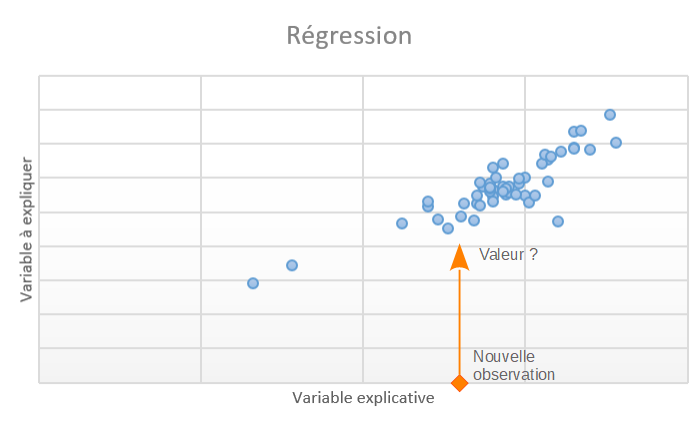

Afin de d√©finir le symbole $\approx$, il faut se donner une classe de fonctions $\mathcal{G}$ (fonctions lin√©aires, fonctions polynomiales, etc) repr√©sentant tous les mod√®les de pr√©vision que l'on s'autorise √† explorer et dans laquelle on va chercher la fonction $f$ qui explique le mieux possible les donn√©es  $(x_i, y_i)$ d√©j√† observ√©es. 
 

*Expliquer le mieux possible les donn√©es* se traduit math√©matiquement par la minimisation d'une fonction de co√ªt que l'on notera $l(\cdot)$ : 
\begin{equation}
\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i))
\end{equation}

Les valeurs de la fonction de co√ªt $l(\cdot)$ seront √©lev√©es lorsque la fonction $f$ n'explique pas bien les donn√©es observ√©es (dans ce cas, la distance entre la valeur $y_i$ observ√©e et la valeur $f(x_i)$ pr√©dite est grande).

Le choix de la fonction de co√ªt ne doit pas √™tre n√©glig√© dans le processus de r√©gression car diff√©rentes fonctions de co√ªt peuvent mener √† diff√©rentes estimations de la fonction recherch√©e $f$.


### 1.1.1 Fonctions de co√ªt classiques

Les deux fonctions de co√ªt les plus classiques sont : 
* la fonction de co√ªt absolu : $l(u) = | u |$,
* la fonction de co√ªt quadratique : $l(u) = u^2$


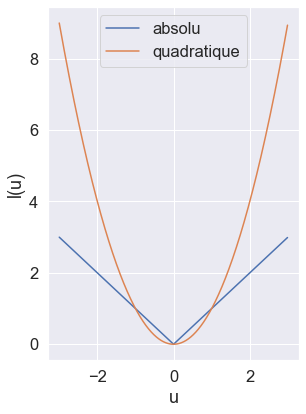

In [3]:
u = np.arange(-3, 3, 0.01)
plt.figure(figsize = (4.5, 6.5))
plt.plot(u, np.abs(u))
plt.plot(u, u**2)
plt.legend(['absolu', 'quadratique'])
plt.xlabel('u')
plt.ylabel('l(u)')
plt.show()

### 1.1.2. Choix des fonctions de la classe $\mathcal{G}$

**Objectif de la r√©gression :** mod√©liser la relation, d√©finie par la fonction $f$, entre les variables $X$ et $Y$. 

**Remarques :**
* Cela permet dans un second temps de pr√©dire la valeur prise par $Y$ pour toute nouvelle mesure de $X$.
* Afin d'estimer $f$ on dispose d'un nombre limit√© d'observations $(x_i, y_i)$. 
* Une premi√®re intuition (erron√©e) serait de trouver les fonctions $f$ qui annulent parfaitement le crit√®re $$\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i))$$  quelle que soit la fonction de co√ªt utilis√©e, c'est-√†-dire l'ensemble des fonctions continues qui passent exactement par les points $(x_i, y_i)$. 

**Pourquoi c'est une mauvaise id√©e ?** 

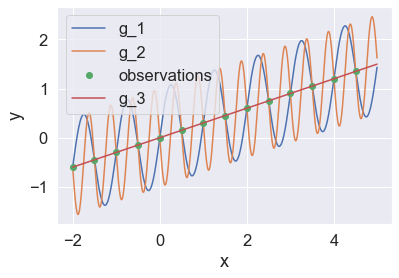

In [4]:
t = np.arange(-2, 5, 0.01)
x = np.arange(-2, 5, 0.5)
y = 0.3*t + np.sin(2*np.pi*t)
plt.plot(t,y)
plt.plot(t, 0.3*t - np.sin(2*np.pi*2*t))
plt.plot(x, 0.3*x, '.', markersize=12 )
plt.plot(t, 0.3*t)
plt.legend(['g_1', 'g_2', 'observations', 'g_3'])
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

g_1 et g_2 passent toutes les deux par tous les points, mais g_3 est plus convenable.

**Crit√®res de choix :**
* on pr√©f√©rera une fonction relativement lisse, souvent param√©trique,
* la fonction ne passe pas forc√©ment par tous les points mais minimise globalement le crit√®re pour la fonction de co√ªt choisie

La classe de fonctions lisses la plus simple est la classe des fonctions affines, on parlera alors de r√©gression lin√©aire (simple). 

D'autres classes de fonctions peuvent √™tre choisie, en particulier lorsque l'observateur dispose d'information $\textit{a priori}$ du ph√©nom√®ne observ√©, **d'o√π l'importance de visualiser graphiquement les donn√©es** avant de r√©aliser une r√©gression. 

<span style="color: #27AE60"> **Exemple :** </span> Quelle classe de fonctions utiliser pour chacun des cas ci-dessous ? 

- Fonction lin√©aire (cf. https://fr.wikipedia.org/wiki/Fonction_lin%C3%A9aire_(analyse))
- Fonction polynomiale du second degr√© (cf. https://fr.wikipedia.org/wiki/Fonction_du_second_degr%C3%A9)
- Fonction trigonom√©trique (cf. https://fr.wikipedia.org/wiki/Fonction_trigonom%C3%A9trique#Repr%C3%A9sentations_graphiques)


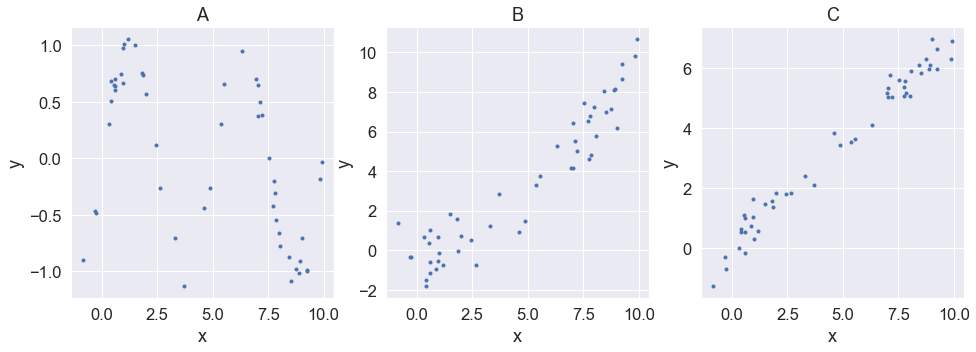

In [55]:
x = np.random.uniform(-1, 10, 50)
x = np.sort(x)
plt.figure(figsize = (16,5))
plt.subplot(131); plt.plot(x, np.sin(2*np.pi*0.2*x)+ np.random.normal(0, 0.1, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('A')
plt.subplot(132); plt.plot(x, x**2/10 + np.random.normal(0, 1, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('B')
plt.subplot(133); plt.plot(x, 0.7*x + np.random.normal(0, 0.4, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('C')
plt.show()

<span style="color: #27AE60"> **Solution :** </span> 

* A : Fonction trigonom√©trique (sinus)
* B : Fonction polynomiale du second degr√©
* C : Fonction lin√©aire

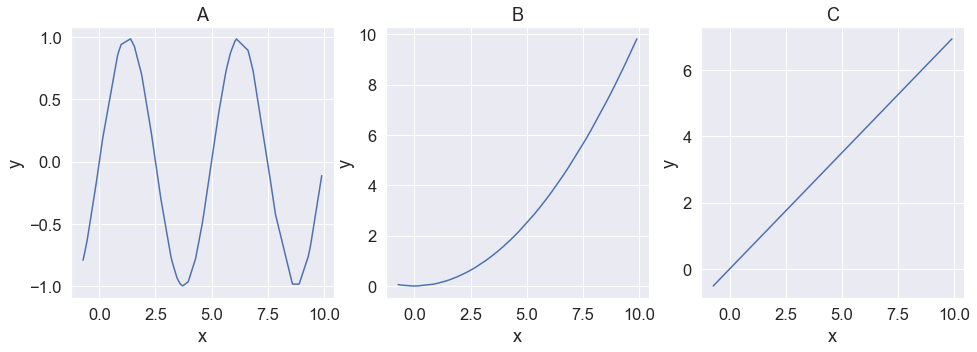

## 1.2. Cas particulier de la r√©gression lin√©aire



La r√©gression lin√©aire consiste √† chercher la droite qui explique au mieux les donn√©es $(x_i, y_i)$ observ√©es. On suppose alors que la relation entre les variables $X$ et $Y$ est de la forme : 
\begin{equation}
Y = a X + b
\end{equation}
En r√©alit√©, les observations sont rarement distribu√©es suivant une droite parfaite.


On suppose alors que la relation $Y = a X + b$ est perturb√©e par un terme $\epsilon$ que l'on appellera *bruit* : 
\begin{equation}
Y = a X + b + \epsilon
\end{equation}


Cette √©quation est appel√©e *mod√®le de r√©gression lin√©aire* (simple), avec :
* $a$ : coefficient de r√©gression
* $b$ : constante de r√©gression
* $\epsilon$ : bruit ou erreur du mod√®le

L'objectif est donc de trouver les valeurs de $a$ et $b$ (qui sont inconnues) permettant de fournir les meilleurs r√©sultats, o√π :

- $b$ est l'ordonn√©e √† l'origine de la droite de r√©gression, c'est-√†-dire la valeur Y quand x vaut 0.

- $a$ est la pente de la droite de r√©gression, c'est-√†-dire la variation de Y quand X augmente d'une unit√©.

La relation peut s'exprimer pour chaque observation $(x_i, y_i)$  : 
\begin{equation}
y_i = a x_i + b + \epsilon_i
\label{eq:modele}
\end{equation}
o√π : 
* $x_i$ est une observation mesur√©e de la variable non al√©atoire $X$, 
* $a$ et $b$ sont les param√®tres du mod√®le √† estimer, 
* $\epsilon_i$ est une r√©alisation inconnue de la variable al√©atoire $\epsilon$, 
* $y_i$ est une r√©alisation observ√©e de la variable al√©atoire $Y$. 

**Estimation de $(\hat a, \hat b)$ :** en g√©n√©ral, utilisation d'une fonction de co√ªt quadratique. 


Ainsi le crit√®re √† minimiser pour estimer $a$ et $b$, qui d√©finissent la droite recherch√©e, est : 
\begin{equation}
\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i) ) = \underset{a,b}{\mbox{argmin}} \sum_{i = 1}^{N} (y_i - a x_i - b )^2
\label{eq:crit_MC}
\end{equation}

Ceci correspond √† minimiser la somme des carr√©s des erreurs (distance entre chaque valeur $y_i$ observ√©e et la valeur pr√©dite sur la ligne : cette distance est aussi appel√©e r√©sidu).

On appelle **estimateur au sens des moindres carr√©s** le couple $(\hat{a}, \hat{b})$ tel que : 
\begin{equation}
(\hat{a}, \hat{b}) = \underset{a,b}{\mbox{argmin}} \sum_{i = 1}^{N} (y_i - a x_i - b )^2 = \underset{a,b}{\mbox{argmin}} S(a,b)
\end{equation}

La fonction $S$ est strictement convexe $\rightarrow$ si elle admet un point singulier alors il s'agit de l'unique minimum de cette fonction. 

Ce minimum correspond aux param√®tres $(\hat{a}, \hat{b})$ recherch√©s.

**M√©thode de calcul de $\hat{a}$ et $\hat{b}$ :**

* Calcul des moyennes empiriques $\bar{x}$ et $\bar{y}$ des variables $X$ et $Y$ √† partir des $N$ observations $(x_i, y_i)$. La droite de r√©gression passe par le point de coordonn√©es ($\bar{x}$, $\bar{y}$).
* Calcul des coefficients de la droite de r√©gression : 

	$\hat{a} = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})}$
	
	$\hat{b} = \bar{y} - \hat{a}\bar{x}$

<span style="color: #27AE60"> **Exemple :**</span>  R√©gression lineaire sur la relation 'num_voted_users' et 'num_user_for_reviews'. 

La question est de savoir si le nombre d'utilisateurs ayant not√© de film est proportionnel au nombre d'utilisateurs ayant √©crit une critique sur le film (ou inversement).

$\rightarrow$ Repr√©sentation des donn√©es sous la forme de nuage de points pour visualiser la lin√©arit√© (ou non) des donn√©es. 

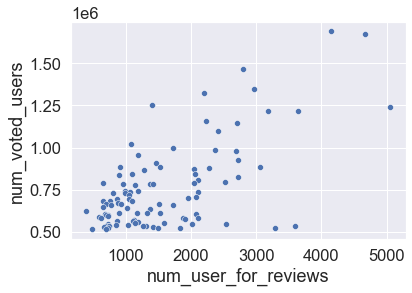

In [56]:
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(DATA.head(n=100), columns=['num_voted_users', 'num_user_for_reviews'])
df2 = (df - df.mean(axis = 0))/df.std(axis = 0)
X = df['num_user_for_reviews'].to_numpy()
X = X.reshape(-1, 1) # √©tape n√©cessaire pour la mise en forme des donn√©es attendue par LinearRegression
Y = df['num_voted_users'].to_numpy()
Y = Y.reshape(-1, 1)
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.show()

Estimation : a = 175.7 et b = 482048.5


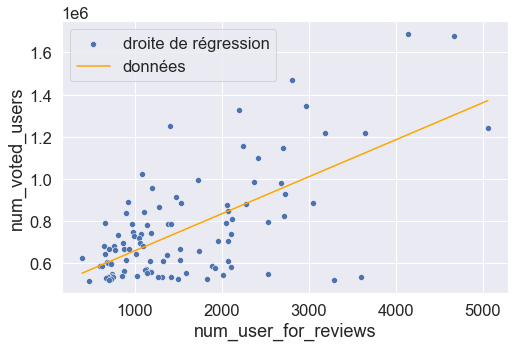

In [57]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(X, Y)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(8,5))
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.legend([ 'droite de r√©gression' ,'donn√©es'])
plt.show()


L'algorithme trouve que les valeurs optimales des param√®tres sont :
* a = 175.72302216 (pente de la droite : num_voted_users augmente d'environ 176 lorsque num_user_for_reviews augmente de 1)
* b = 482048.49006826 (le mod√®le pr√©dit que num_voted_users vaut environ 482 048 quand num_user_for_reviews vaut 0)

## 1.3. Pr√©diction lin√©aire

Une fois les param√®tres de la droite de r√©gression lin√©aire estim√©s, il est possible d'utiliser ce mod√®le pour r√©aliser des pr√©dictions. Pour toute nouvelle valeur $x_{N+1}$ mesur√©e, on peut calculer la pr√©diction :
\begin{equation}
\hat{y}_{N+1} = \hat{a} x_{N+1} + \hat{b}
\end{equation}

Il s'agit d'une estimation, car la vraie valeur $y_{N+1}$ a l'expression suivante : 
\begin{equation}
y_{N+1} = a x_{N+1} + b + \epsilon_{N+1}
\end{equation}
o√π 
* $a$ et $b$ sont les vraies valeurs (inconnues) de la droite de r√©gression,
* $\epsilon_{N+1}$ est une r√©alisation (inconnue) du bruit $\epsilon$.

Pour pr√©dire une valeur pour une nouvelle observation (par exemple num_user_for_reviews = 1000), on proc√®de de la mani√®re suivante :

In [58]:
X_new = [[1000]]
print(linear_regressor.predict(X_new))

[[657771.51222454]]


**Erreur de pr√©diction**

On appelle *erreur de pr√©diction* la quantit√© 
\begin{equation}
e_{N+1} = y_{N+1} - \hat{y}_{N+1} = (a -\hat{a})x_{N+1} + (b - \hat{b}) + \epsilon_{N+1}.
\end{equation}
L'erreur de pr√©diction rassemble deux sources d'erreurs : 
* l'erreur de mod√©lisation repr√©sent√©e par $\epsilon_{N+1}$,
* l'erreur r√©alis√©e sur les estimateurs $\hat{a}$ et $\hat{b}$.

Sur l'exemple pr√©c√©dent, on utilise la droite de r√©gression estim√©e et on la compare aux donn√©es elles-m√™mes. Dans le cas d'une relation lin√©aire parfaite, les donn√©es se situent sur la droite, dans ce cas la pr√©diction pour un nouveau film sera pr√©cise. Dans notre cas, on peut remarquer que l'erreur de pr√©diction sera grande car les points s'√©cartent beaucoup de la droite estim√©e. 

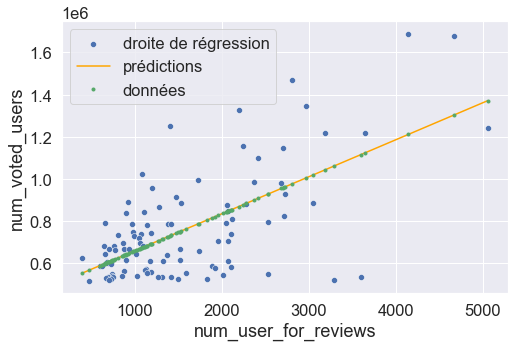

In [59]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,normalize=True)
result = linear_regressor.fit(X, Y)
y_pred =  result.intercept_ + X*result.coef_[0]
plt.figure(figsize=(8,5))
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.plot(X, y_pred, '.g')
plt.legend([ 'droite de r√©gression','pr√©dictions' ,'donn√©es'])
plt.show()

**Coefficient de d√©termination $R^2$**

Le coefficient de d√©termination $R^2$ est le rapport entre la variance expliqu√©e par la r√©gression et la variance des observations de $Y$ : 
\begin{equation}
R^2 = \frac{\sum(\hat{y}_i - \bar{y})^2}{\sum(y_i - \bar{y})^2}
\end{equation}

**Propri√©t√©s :**
* indicateur de qualit√© de la r√©gression lin√©aire,
* mesure le degr√© de ressemblance entre la droite de r√©gression lin√©aire et les donn√©es r√©ellement observ√©es,
* $R^2 = 1$ indique que la droite de r√©gression ajuste parfaitement les donn√©es,
* $R^2 = 0$ indique le mod√®le de r√©gression lin√©aire n'explique pas du tout les donn√©es

Graphiquement cela signifie que plus $R^2$ est proche de 1, plus les observations $(x_i, y_i)$ sont proches de la droite de r√©gression estim√©e.

In [60]:
# Calcul du coefficient de d√©termination (ùëÖ¬≤) avec .score() :
r_sq = result.score(X, Y)
print('coefficient de determination:', r_sq)

coefficient de determination: 0.4212334332231845


## 1.4. Corr√©lation

Pour savoir quand il est utile de faire une r√©gression lin√©eaire entre deux variables X et Y, on peut : 
* repr√©senter les donn√©es sous forme de nuage de points, dans ce cas les points doivent se r√©partir selon une droite, 
* calculer le coefficient de coor√©lation des deux variables X et Y. 


**D√©finition :**

Soient deux variables al√©atoires $X$ et $Y$ d√©finies dans $\mathbb{R}^N$ ($N$ individus observ√©s), on d√©finit leur corr√©lation par : 
\begin{equation*}
Cor(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X) \times Var(Y)}} =  \frac{1}{N}\sum_{i = 1}^N \frac{(x_i - \bar{x})}{\sigma_X}\frac{(y_i - \bar{y})}{\sigma_Y}
\end{equation*}

**Propri√©t√©s :**
* La corr√©lation prend ses valeurs dans $[-1,1]$. 
* Si $Cor(X,Y) = 1$ alors il existe une relation affine entre $X$ et $Y$, l'une des variables est une fonction affine croissante de l'autre variable. 
* Si $Cor(X,Y) = -1$ l'une des variables est une fonction affine d√©croissante de l'autre variable, on dit qu'elles sont anticorr√©l√©es.
* Si les variables $X$ et $Y$ sont ind√©pendantes lin√©airement alors $Cor(X,Y) = 0$. 
* Corr√©lation $\neq$ causalit√©

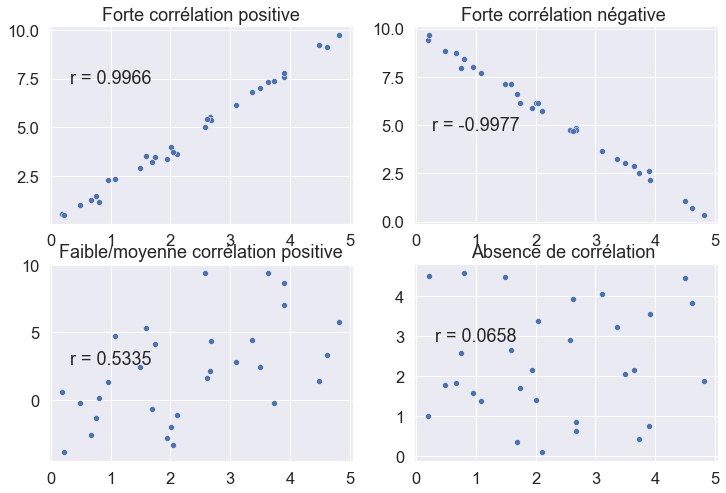

In [61]:
N = 30
x = np.random.uniform(0, 5, N)
y1 = 2*x + np.random.normal(0,0.2, N)
y2 = 10-2*x + np.random.normal(0,0.2, N)
y3 = np.random.normal(x,3,N)
y4 = np.random.uniform(0, 5, N)

plt.figure(figsize = (12, 8))
plt.subplot(221)
sns.scatterplot(x = x, y = y1)
plt.title('Forte corr√©lation positive')
plt.text(1,7.5 , 'r = '+str(np.round(np.corrcoef(x,y1)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(222)
sns.scatterplot(x = x, y = y2)
plt.title('Forte corr√©lation n√©gative ')
plt.text(1,5 , 'r = '+str(np.round(np.corrcoef(x,y2)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(223)
sns.scatterplot(x = x, y = y3)
plt.title('Faible/moyenne corr√©lation positive')
plt.text(1,3 , 'r = '+str(np.round(np.corrcoef(x,y3)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(224)
sns.scatterplot(x = x, y = y4)
plt.title('Absence de corr√©lation ')
plt.text(1,3 , 'r = '+str(np.round(np.corrcoef(x,y4)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.show()

Lorsque l'on a plus que 2 variables, on peut diagnostiquer les relations lin√©aires parmi tous les couples de variables en calculant tous les coefficients de corr√©lation √† l'aide d'une unique fonction. 

In [62]:
df = pd.DataFrame(DATA.head(n=80), columns=['imdb_score', 'budget', 'duration'])
df.corr()

imdb_score    budget  duration
imdb_score    1.000000 -0.302542  0.173475
budget       -0.302542  1.000000  0.327186
duration      0.173475  0.327186  1.000000

<AxesSubplot:xlabel='budget', ylabel='imdb_score'>

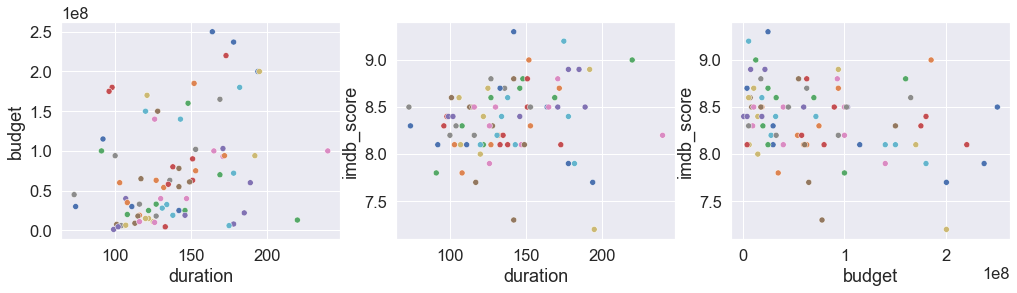

In [63]:
plt.figure(figsize = (17, 4))
plt.subplot(131)
sns.scatterplot(x = 'duration', y = 'budget', data=df, hue = df.index, legend = False, palette='deep')
plt.subplot(132)
sns.scatterplot(x = 'duration', y = 'imdb_score', data=df, hue = df.index, legend = False, palette='deep')
plt.subplot(133)
sns.scatterplot(x = 'budget', y = 'imdb_score', data=df, hue = df.index, legend = False, palette='deep')

**Corr√©lation de Spearman :**
Il existe d'autres types de corr√©lations d√©di√©es aux relations non lin√©aires entre les variables, en particulier la corr√©lation de Spearman. La corr√©lation est r√©alis√©e sur les rangs des valeurs. 

Prenons deux variables $X$ et $Y$ pour lesquelles on dispose de $N$ √©chantillons $x_1, x_2, ..., x_N$ et $y_1, y_2, ..., y_N$. Si la relation entre les variables $X$ et $Y$ n'est pas lin√©aire, il peut cependant exister une relation non lin√©aire. Pour d√©tecter une telle relation, on ordonne les valeurs $x_1, x_2, ..., x_N$ dans l'ordre croissant, de m√™me pour $y_1, y_2, ..., y_N$. On note $r_{x_i}$ le rang de la variable $x_i$ et $r_{y_i}$ le rang de la variable $y_i$, on a ainsi deux nouvelles variables $R_x$ et $R_y$ dont les valeurs sont les $r_{x_i}$ et $r_{y_i}$. 

La corr√©lation de Spearman pour les variables $X$ et $Y$ correspond √† la corr√©lation de Pearson (corr√©lation lin√©aire) pour les variables de rang associ√©e : on cherche s'il y a une relation lin√©aire entre les rangs des valeurs des variables $X$ et $Y$. 

<span style="color: #27AE60"> **Exemple :** </span>  Calculons la matrice de corr√©lation de Pearson et de Spearman pour les 100 premi√®res valeurs du DataFrame DATA. 

In [64]:
# Corr√©lation de Pearson
DATA.head(n=100).corr()

num_critic_for_reviews  duration  num_voted_users  \
num_critic_for_reviews                1.000000  0.166557         0.024987   
duration                              0.166557  1.000000         0.401765   
num_voted_users                       0.024987  0.401765         1.000000   
facenumber_in_poster                 -0.028411  0.080304        -0.064342   
num_user_for_reviews                  0.222461  0.339375         0.649025   
budget                                0.651942  0.253467         0.057579   
title_year                            0.738530  0.005758        -0.082154   
imdb_score                           -0.364040  0.179884         0.636375   

                        facenumber_in_poster  num_user_for_reviews    budget  \
num_critic_for_reviews             -0.028411              0.222461  0.651942   
duration                            0.080304              0.339375  0.253467   
num_voted_users                    -0.064342              0.649025  0.057579   
facenumber_in_poster                1.000000             -0.043650  0.124225   
num_user_for_reviews               -0.043650              1.000000  0.275731   
budget                              0.124225              0.275731  1.000000   
title_year                          0.112828              0.182785  0.598819   
imdb_score                         -0.102363              0.122475 -0.436662   

                        title_year  imdb_score  
num_critic_for_reviews    0.738530   -0.364040  
duration                  0.005758    0.179884  
num_voted_users          -0.082154    0.636375  
facenumber_in_poster      0.112828   -0.102363  
num_user_for_reviews      0.182785    0.122475  
budget                    0.598819   -0.436662  
title_year                1.000000   -0.475134  
imdb_score               -0.475134    1.000000

In [65]:
# Corr√©lation de Spearman
DATA.head(n=100).corr(method = 'spearman')

num_critic_for_reviews  duration  num_voted_users  \
num_critic_for_reviews                1.000000  0.115119        -0.068171   
duration                              0.115119  1.000000         0.432088   
num_voted_users                      -0.068171  0.432088         1.000000   
facenumber_in_poster                  0.009325  0.102197        -0.013003   
num_user_for_reviews                  0.334383  0.430872         0.476475   
budget                                0.632532  0.293354         0.002443   
title_year                            0.860472  0.046159        -0.183456   
imdb_score                           -0.467685  0.239588         0.687629   

                        facenumber_in_poster  num_user_for_reviews    budget  \
num_critic_for_reviews              0.009325              0.334383  0.632532   
duration                            0.102197              0.430872  0.293354   
num_voted_users                    -0.013003              0.476475  0.002443   
facenumber_in_poster                1.000000             -0.046714  0.088542   
num_user_for_reviews               -0.046714              1.000000  0.276962   
budget                              0.088542              0.276962  1.000000   
title_year                          0.097120              0.204080  0.641049   
imdb_score                         -0.034167              0.125393 -0.397418   

                        title_year  imdb_score  
num_critic_for_reviews    0.860472   -0.467685  
duration                  0.046159    0.239588  
num_voted_users          -0.183456    0.687629  
facenumber_in_poster      0.097120   -0.034167  
num_user_for_reviews      0.204080    0.125393  
budget                    0.641049   -0.397418  
title_year                1.000000   -0.533065  
imdb_score               -0.533065    1.000000

**Observations :** Lorsqu'il exsite effectivement une relation lin√©aire entre deux variables, la corr√©lation de Spearman sera √©galement √©lev√©e (par exemple entre les variables num_critic_for_reviews et title_year).

**Repr√©sentations graphiques de la matrice de corr√©lation**



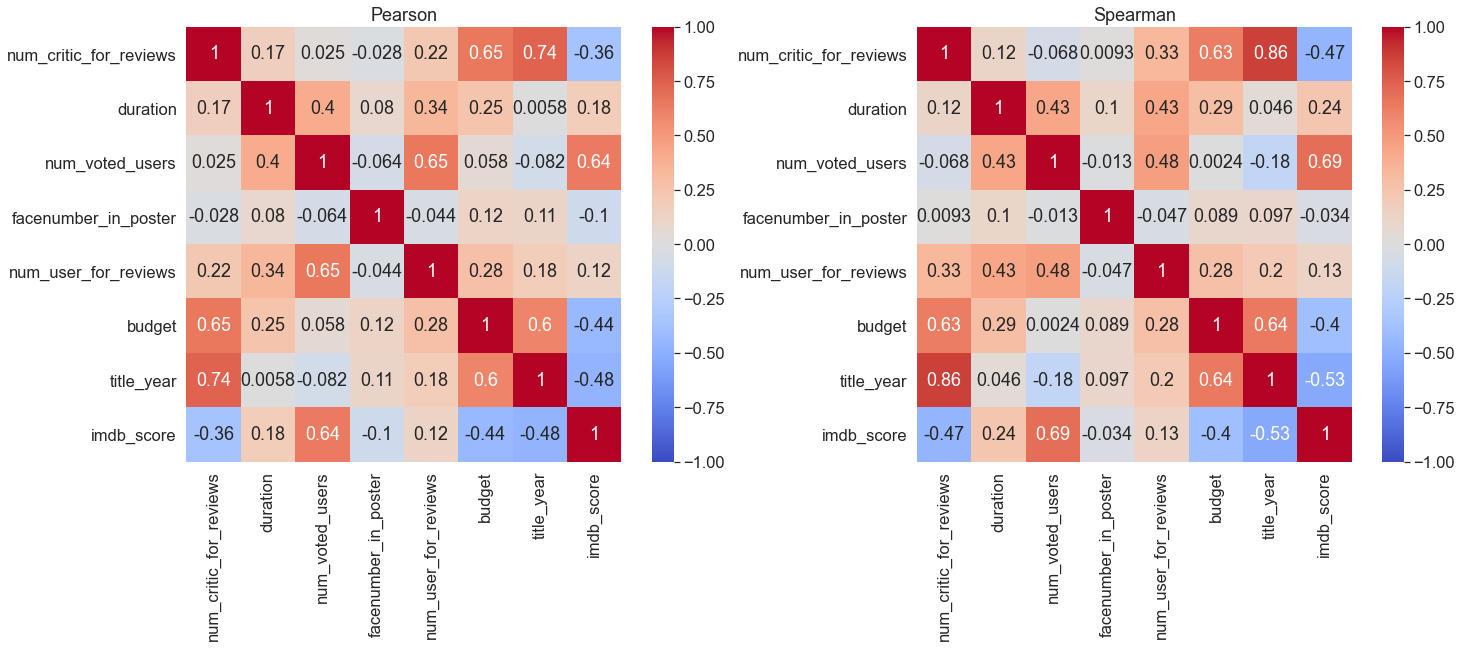

In [68]:
plt.figure(figsize =(24,8))
plt.subplot(121)
sns.heatmap(DATA.head(n=100).corr(method = 'pearson'), annot = True,vmin = -1, vmax = 1, cmap="coolwarm", square = True)
plt.title('Pearson')
plt.subplot(122)
sns.heatmap(DATA.head(n=100).corr(method = 'spearman'), annot = True,vmin = -1, vmax = 1, cmap="coolwarm", square = True)
plt.title('Spearman')
plt.show()

# 2. Classification

**Classification :** L'objectif de la classification (*clustering* en anglais) est de s√©parer un ensemble de donn√©es en plusieurs groupes distincts. La classification permet d'identifier le groupe ou la classe √† laquelle appartient un individu en fonction de ses caract√©ristiques (valeurs prises par les diff√©rentes variables observ√©es). On cherche √† donner une √©tiquette (un label) √† chaque individu. 

**Quelles applications pour la classification ?** 

La classification peut servir √† : 
* l'identification reconnaissance de plantes, 
* l'identification d'animaux sur des photos,
* d√©tecter automatiquement les spams dans une boite mail en fonction des mots/caract√®res pr√©sents. 

Elle peut √™tre utiliser en traitement d'images couleurs pour s√©parer les pixels qui ont une couleur similaire, etc.

Si l'on connait les classes qui composent une population, √† l'arriv√©e d'un nouvel individu, l'√©tude de ses diff√©rentes caract√©ristiques permettra de le ranger dans la classe correspondante. 

Il existe deux grandes familles de m√©thodes de classification : les m√©thodes de classification supervis√©e et les m√©thodes de classification non supervis√©e.

**Classification supervis√©e :** les classes sont pr√©alablement connues et on dispose d'un ensemble de donn√©es labellis√©s (c'est-√†-dire pour lesquelles la classe est d√©j√† connue) que l'on appelle jeu de donn√©es d'apprentissage. 

$\rightarrow$ objectif : construire une r√®gle de classement sur le jeu de donn√©es d'apprentissage pour pr√©dire la classe d'appartenance d'un nouvel individu

Cela signifie qu'il est n√©cessaire de mettre en place une phase d'apprentissage sur des donn√©es dont on connait d√©j√† la classe d'appartenance. Les m√©thodes de classification supervis√©e visent √† apprendre les caract√©ristiques des diff√©rentes classes (i.e. les valeurs typiques des variables pour chacune des classes) durant cette phase d'apprentissage par l'exemple. 


**Classification non supervis√©e :** la caract√©risation des diff√©rentes classes (et √©ventuellement leur nombre) est r√©alis√©e en m√™me temps que la r√©partition des diff√©rents individus en classe. Il n'y a donc pas de phase d'apprentissage pour ces m√©thodes de classification.

$\rightarrow$ objectif : partitionner les individus en diff√©rentes classes homog√®nes dont les r√®gles d'appartenance d√©pendent des observations r√©alis√©es. 



<span style="color: #900C3F"> **Remarque :**</span> lorsque l'on fait une classification √† partir d'un jeu de donn√©es multidimensionnel, les classes peuvent par exemple correspondre aux modalit√©s d'une **variable qualitative**. Notons √©galement que dans la pratique le nombre de classes doit √™tre limit√© !

<span style="color: #27AE60"> **Exemple :**</span> Sur la base de film, les classes pourraient correspondre √† la classification cin√©matographique. En revanche la variable 'nom du r√©alisateur' n'est sans doute pas un bon choix de classification. 

In [11]:
print('Modalit√©s de la variable content_rating : \n' , set(DATA.content_rating))
print('\nNombre de r√©alisateurs dans la base IMdB : ', len(set(DATA.director_name)))

Modalit√©s de la variable content_rating : 
 {'Not Rated', 'R', 'PG-13', 'NC-17', 'Approved', 'Passed', 'M', 'G', 'PG', 'GP'}

Nombre de r√©alisateurs dans la base IMdB :  1944


<span style="color: #900C3F"> **Remarque :**</span> L'exemple de classification sur la base de film en fonction de la classification cin√©matographique est triviale, et peu informative. Bien souvent la classification ne d√©pend pas d'une seule variable, les classes obtenues sont la plupart du temps issues d'une combinaison complexe entre les diff√©rentes variables du jeu de donn√©es et font √©merger des classes bas√©es sur des informations *haut niveau*, c'est-√†-dire avec un niveau d'interpr√©tation relativement complexe des diff√©rentes variables √† disposition. 

### Algorithme des k plus proches voisins

$\rightarrow$ Algorithme de classification supervis√©e, en anglais *KNN* pour $k$*-nearest neighbors*.


**Principe :** une nouvelle observation appartient √† la m√™me classe que les $k$ donn√©es les plus proches parmi les donn√©es disponibles. 

* Afin de d√©finir la proximit√© entre deux observations, il faut se donner une mesure de distance. 
* Distance la plus simple : distance euclidienne. 



Pour rappel, soit $A = [a_1, \dots, a_p]$ et $B = [b_1, \dots, b_p]$ la distance euclidienne entre ces deux vecteurs de taille $p$ s'√©crit : 
\begin{equation}
d(A,B) = \sqrt{\sum_{i = 1}^p (a_i - b_i)^2}
\end{equation}

**Pour chaque nouvel individu :**
* calcul de sa distance √† tous les individus d√©j√† class√©s,
* s√©lection des $k$ individus les + proches,
* attribution de la classe : vote majoritaire (la classe la plus repr√©sent√©e parmi les $k$ plus proches voisins)



<span style="color: #27AE60"> **Exemple :**</span> Illustration sur un extrait de la base de donn√©es : on s√©lectionne tous les films dont le genre principal est "Horror", "Crime" ou "Adventure". On construit un jeu d'apprentissage en prenant 90% de ces films dont le genre est connu. On suppose que le genre constitue le label (i.e. la classification) du film. On utilise les 5 derniers films du jeu de donn√©es initial pour jouer le r√¥le de jeu de test, on suppose alors que le genre n'est pas connu. 

genres
Adventure    402
Crime        279
Horror       186
dtype: int64


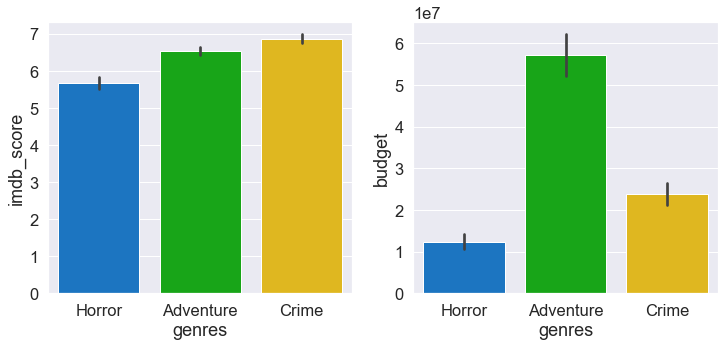

In [39]:
Genre1 = "Horror"
Genre2 = "Crime"
Genre3 = "Adventure"

films = DATA[(DATA.genres.str.startswith(Genre1)) | (DATA.genres.str.startswith(Genre2)) | (DATA.genres.str.startswith(Genre3))]
films.genres[films.genres.str.startswith(Genre1)] = Genre1
films.genres[films.genres.str.startswith(Genre2)] = Genre2
films.genres[films.genres.str.startswith(Genre3)] = Genre3
print(films.groupby('genres').size())

films2 = pd.DataFrame(data = films,columns= ['imdb_score', 'budget', 'genres'] )
label = films2['genres']
data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(films2, label, test_size=0.01)


plt.figure(figsize = (12,5))
plt.subplot(121)
sns.barplot(y ="imdb_score", x="genres", data= data_apprentissage,palette ='nipy_spectral',hue_order = [Genre1, Genre2, Genre3])
plt.subplot(122)
sns.barplot(y ="budget", x="genres", data= data_apprentissage, palette ='nipy_spectral',hue_order = [Genre1, Genre2, Genre3]); 

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
X = data_apprentissage.drop(columns ='genres') 

KNN = KNeighborsClassifier(n_neighbors= 3,weights='uniform') 
# Phase d'apprentissage
KNN.fit(X, label_apprentissage) 

KNeighborsClassifier(n_neighbors=3)

In [45]:
Xtest = data_test.drop(columns = 'genres')

print('Pr√©diction : ', KNN.predict(Xtest))
print('V√©rit√© : ' , label_test)

Pr√©diction :  ['Horror' 'Adventure' 'Horror' 'Adventure' 'Adventure' 'Adventure'
 'Adventure' 'Adventure' 'Adventure']
V√©rit√© :  movie_title
Halloween: The Curse of Michael Myers       Horror
Frozen                                   Adventure
L.I.E.                                       Crime
The Bank Job                                 Crime
Shattered                                    Crime
We Own the Night                             Crime
Cold Mountain                            Adventure
The Cat in the Hat                       Adventure
Shark Tale                               Adventure
Name: genres, dtype: object


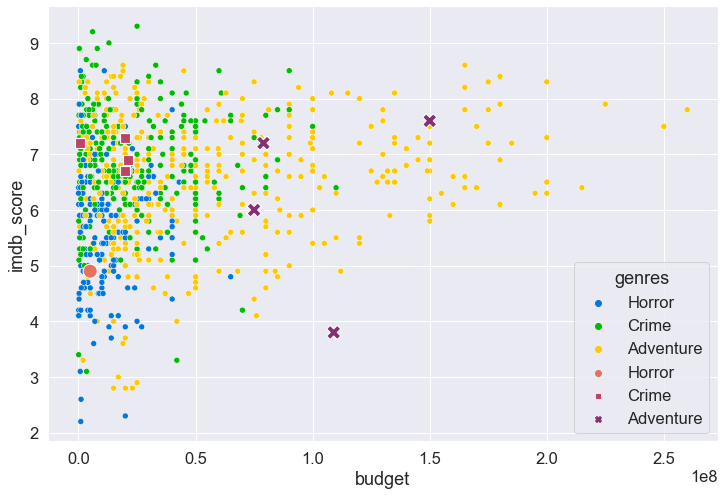

In [46]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = data_apprentissage, x = 'budget', y = 'imdb_score', hue = 'genres', legend = 'full', palette ='nipy_spectral', hue_order = [Genre1, Genre2, Genre3])
sns.scatterplot(data = data_test, x = 'budget', y = 'imdb_score',style='genres',s=200, hue = 'genres', legend = 'full',palette = 'flare', hue_order = [Genre1, Genre2, Genre3])
plt.show()

# 4. Evaluation des performances

**Validation crois√©e simple :** cela consiste en s√©parer le jeu de donn√©es en deux √©chantillons, le premier servant √† l'apprentissage et le second servant de test.

Exemple : Si l'on effectue une classification sur le genre des films (variable 'genres'), on peut s√©lectionner 90% de la base de film pour apprendre la classification en fonction des autres variables (quantitatives) : 'budget' et 'imdb_score'. Et sur les 10% restant, on teste l'efficacit√© du classifieur en supprimant l'information de genres et en l'estimant.

In [50]:
data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(films2, label, test_size=0.01)
X = data_apprentissage.drop(columns ='genres') 
KNN = KNeighborsClassifier(n_neighbors= 3,weights='uniform') 
KNN.fit(X, label_apprentissage) 

Xtest = data_test.drop(columns = 'genres')

print('Pr√©diction : ', KNN.predict(Xtest)[0:len(films_test)])
print('V√©rit√© : ', y_truth.T)
print('Taux de bonne classification : ', np.sum(KNN.predict(Xtest) == label_test)/len(data_test))
print('Taux de bonne classification calcul√© directement avec le classifieur : ', KNN.score(Xtest, label_test))

Pr√©diction :  ['Horror' 'Horror' 'Crime' 'Adventure' 'Crime' 'Horror' 'Crime' 'Crime'
 'Adventure']
V√©rit√© :  [['Crime' 'Horror' 'Adventure' 'Adventure' 'Horror' 'Horror' 'Crime'
  'Adventure' 'Horror' 'Crime']]
Taux de bonne classification :  0.7777777777777778
Taux de bonne classification calcul√© directement avec le classifieur :  0.7777777777777778


Le taux de bonne classification correspond au nombre de films correctement class√©s sur le nombre total de films de la base de test. 


Afin d'obtenir un taux de bonne classification repr√©sentatif de l'algorithme, il faut recommencer plusieurs fois la validation crois√©e en choisissant au hasard les individus servant au test et √† l'apprentissage. 

**Syntaxe python :** Attention ce code ne fonctionne pas, il faut d√©finir le jeux de donn√©es, les labels et placer dans la boucle l'algorithme de classification.

In [22]:
df = ... # D√©finir le jeu de donn√©es sur lequel vous travaillez
M = 10 #Nombre de validations
prop_bonne_classif = np.zeros(K)
for m in range(M):
    data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(df, label, test_size=0.1)
    


    ##
    ## -- Ecrire la classification a effectuer -- ##
    ##
    prop_bonne_classif[m] = np.sum(prediction == label_test)/len(data_test))  
taux_bonne_classif = np.mean(prop_bonne_classif) 

SyntaxError: unmatched ')' (1966081026.py, line 13)

# R√©f√©rences

Galerie d'exemples de m√©thodes de r√©gression et de classification avec scikit-learn : https://scikit-learn.org/stable/auto_examples/index.html 

Livre sur la r√©gression : [R√©gression - Th√©orie et applications, Pierre-Andr√© Cornillon, √âric Matzner-L√∏ber](https://link-springer-com.scd-rproxy.u-strasbg.fr/book/10.1007%2F978-2-287-39693-9) (disponible via la biblioth√®que de l'Unistra)